<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Amazon__NLP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Women's Clothing Reviews

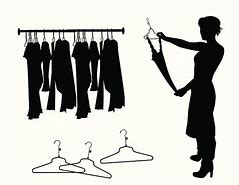

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

import math
import pandas as pd
import seaborn as sns
import string
import random
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [5]:
df.shape

(23486, 11)

In [7]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [9]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [10]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [12]:
print("Class Names: ", df['Class Name'].unique())
print ("**********")
print("Department Names:", df['Department Name'].unique())
print ("**********")
print("Division Names:", df['Division Name'].unique())
print ("**********")

Class Names:  ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']
**********
Department Names: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
**********
Division Names: ['Initmates' 'General' 'General Petite' nan]
**********


In [13]:
# Dropping unnecessary columns 

df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace=True)

In [14]:
# Checking to confirm unnecessary columns have been dropped 
df.head(2)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [15]:
# Checking for missing values 
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

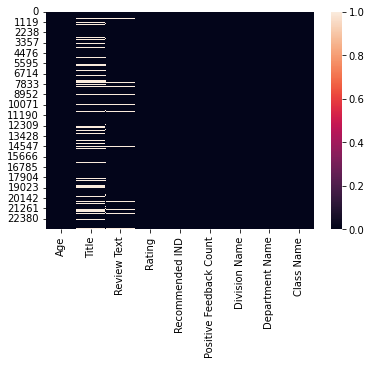

In [16]:
# Distribution of null values 
sns.heatmap(df.isnull())

In [17]:
# Dropping rows with null values 

df.dropna(axis=0, inplace=True)

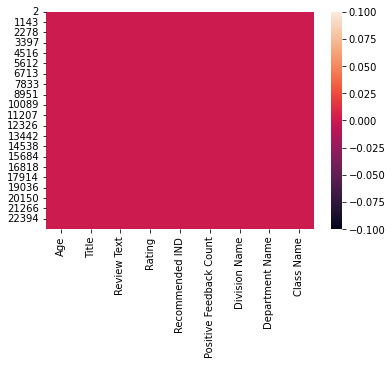

In [18]:
# There are no null values in the dataset

sns.heatmap(df.isnull())

In [19]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [20]:
 # Renaming Columns 
df = df.rename(columns = {'Review Text' : 'Text', 'Recommended IND' : 'Recommended', 'Positive Feedback Count' : 'Feedback_Count',
                          'Division Name' : 'Division', 'Department Name' : 'Department', 'Class Name' :'Class'})

In [21]:
# New Column Names 
df.columns

Index(['Age', 'Title', 'Text', 'Rating', 'Recommended', 'Feedback_Count',
       'Division', 'Department', 'Class'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



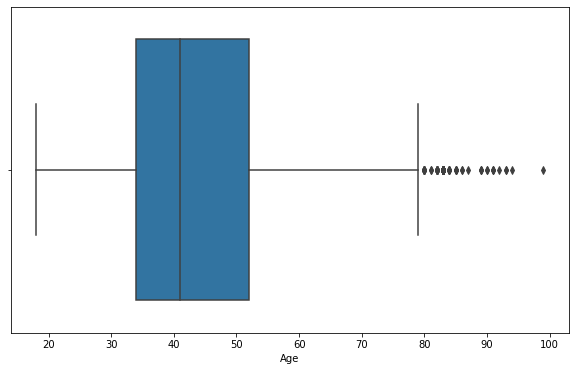

In [22]:
# Checking outliers 

plt.figure(figsize=(10,6))
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



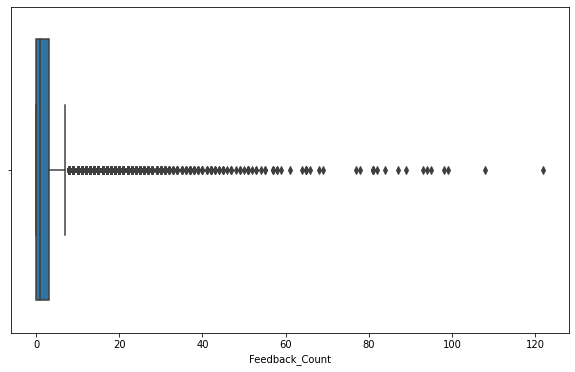

In [23]:
# Checking outliers 

plt.figure(figsize=(10,6))
sns.boxplot(df['Feedback_Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



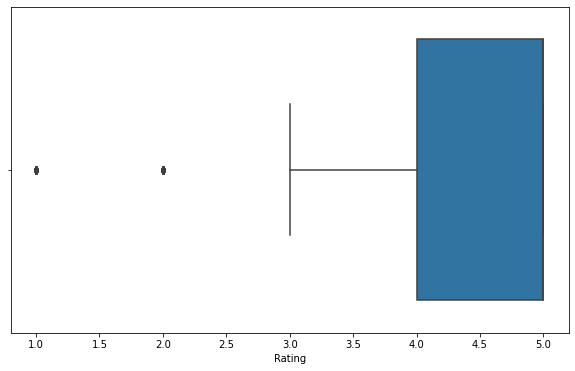

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Rating'])

In [25]:
# Correlation 

df.corr()

,Age,Rating,Recommended,Feedback_Count
Age,1.000000,0.034910,0.035407,0.041167
Rating,0.034910,1.000000,0.793145,-0.056659
Recommended,0.035407,0.793145,1.000000,-0.059452
Feedback_Count,0.041167,-0.056659,-0.059452,1.000000


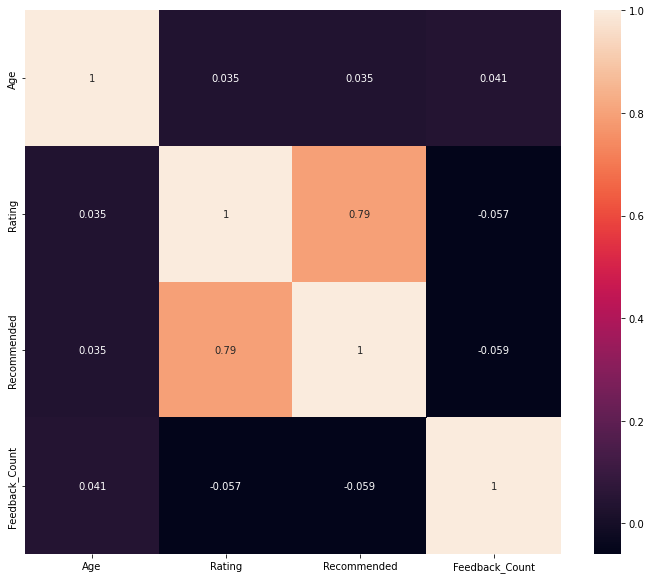

In [27]:
# Correlation Plot 
correlation = df.corr()
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(correlation, annot=True)
correlation.round(4);

Ratings are highly correlated to recommendations positively

Ratings and Feedback count are negatively correlated

In [28]:
# Using pip
!pip install plotnine # Grammar of Graphics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
df.dtypes

Age                int64
Title             object
Text              object
Rating             int64
Recommended        int64
Feedback_Count     int64
Division          object
Department        object
Class             object
dtype: object

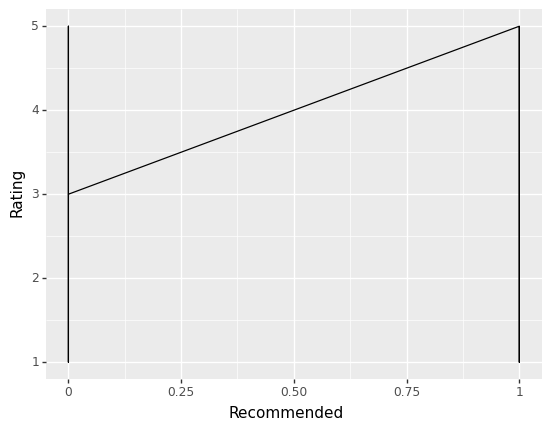

<ggplot: (8789285084489)>

In [32]:
from plotnine import ggplot, aes, geom_line, geom_bar

# Relationship between Ratings and Recommendations 

(
    ggplot(df)  # What data to use
    + aes(x="Recommended", y="Rating")  # What variable to use
    + geom_line()
    )  # Geometric object to use for drawing

# EDA

In [33]:
# Bar Plot Function for Univariate Analysis 
def univariate_visuals(column, kind, title, xlabel, ylabel): 
  sns.set(font_scale=1.5)
  if kind == 'pie':
    df[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize= (12,8), rot=90)
  elif kind =='bar':
    df[column].value_counts().plot(kind=kind, figsize= (12,8), rot=90)
  plt.xlabel(xlabel=xlabel, labelpad =12)
  plt.ylabel(ylabel=ylabel, labelpad = 12)
  plt.title (title, y=1)
  return plt.show()


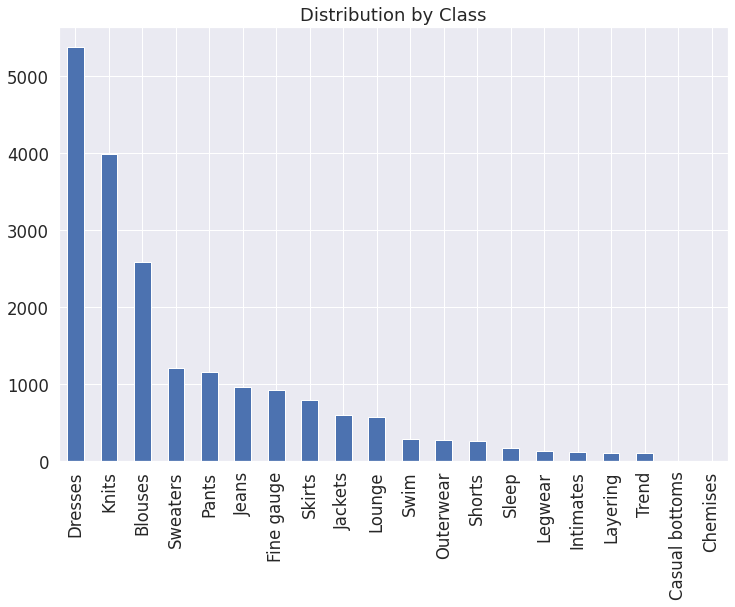

In [34]:
univariate_visuals('Class', 'bar', 'Distribution by Class', '', '')

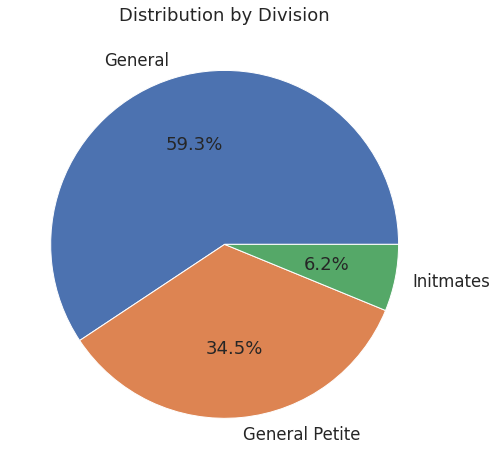

In [35]:
univariate_visuals('Division', 'pie', 'Distribution by Division', '', '')

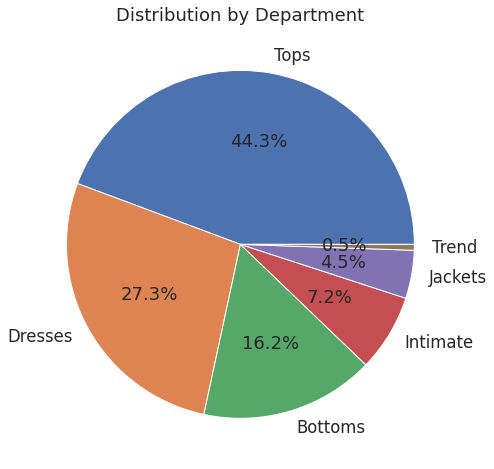

In [36]:
univariate_visuals('Department', 'pie', 'Distribution by Department', '', '')

In [37]:
fig = px.histogram(df, x='Age', color='Age', template='plotly_dark')
fig.show()

In [38]:
fig2 = px.histogram(df, x='Rating', color='Rating', template='plotly_dark')
fig2.show()

In [39]:
fig = px.histogram(df, x='Recommended',color='Recommended',template='plotly_dark')
fig.show()

In [40]:
fig = px.histogram(df, x='Feedback_Count', color='Feedback_Count', template='plotly_dark')
fig.show()

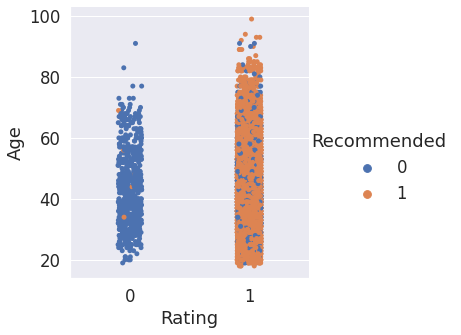

In [51]:
sns.catplot(x="Rating", y="Age", hue="Recommended",data= df)

Products with review ratings of 1 and 2 and not recommended while 4 and 5 are often recommended

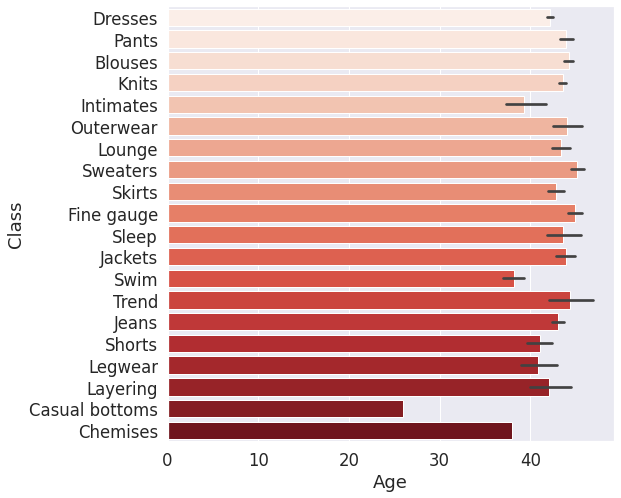

In [86]:
# Layering to view relationship between class and age 

sns.set_style('darkgrid')
sns.barplot(x=df['Age'], y=df['Class'],palette="Reds")

Casual Bottoms are preffered by the ladies between the ages of 20 and 30

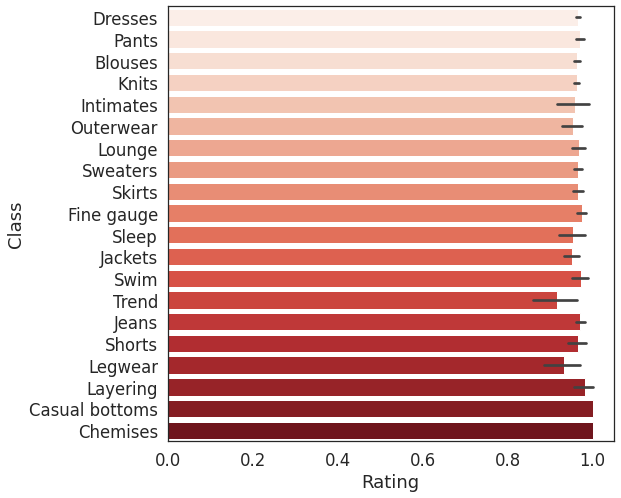

In [89]:
sns.set_style('white')
sns.barplot(x=df['Rating'], y=df['Class'], palette='Reds')

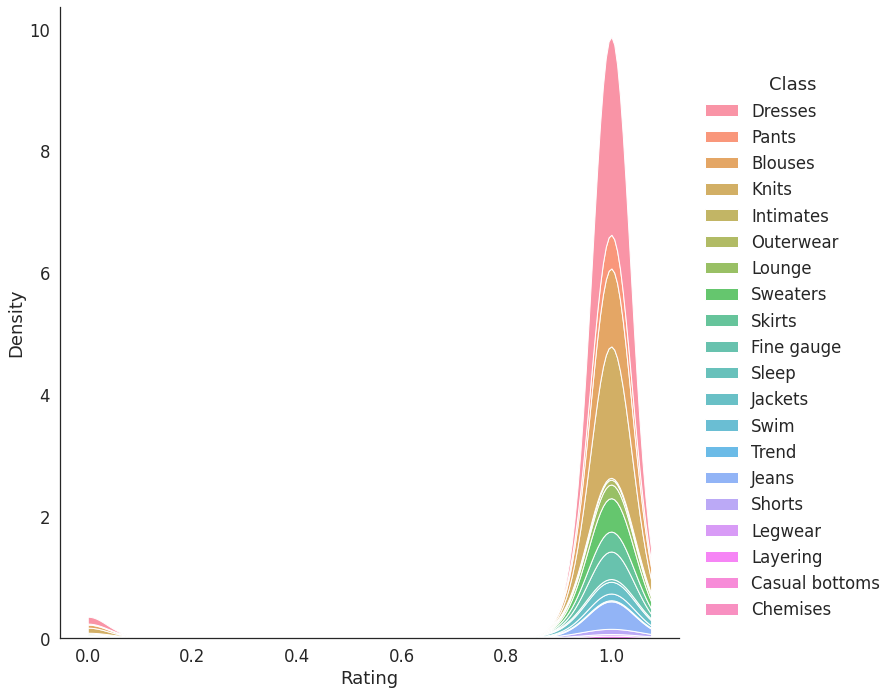

In [83]:
# Displot to show the distribution of ratings by the different class categories 

sns.displot(data=df,
           x='Rating', hue="Class",
    kind="kde", height=10,
    multiple="stack", clip=(0, None),
)

Dresses, Pants and Blouses have the 3 highest densities for positive ratings respectively.

<function matplotlib.pyplot.show>

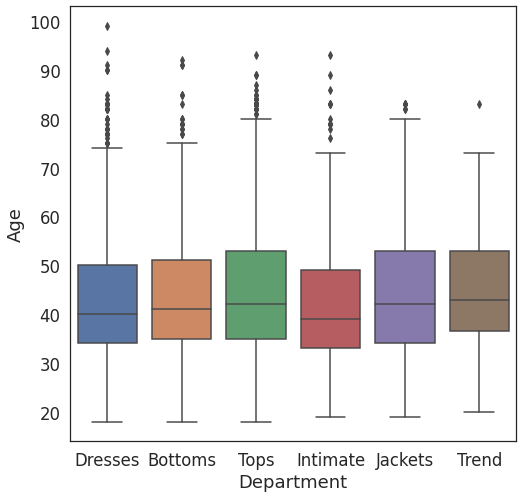

In [93]:
# Box plot to show mean age by department 

sns.boxplot(x=df['Department'], y=df['Age'])
plt.show


<function matplotlib.pyplot.show>

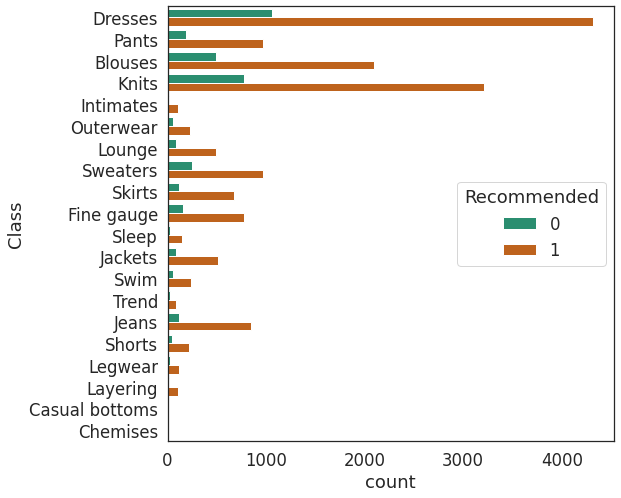

In [101]:
# Graph to show the classes that are highly recommended

sns.countplot(data=df, y='Class', hue='Recommended', palette='Dark2')
plt.show

<function matplotlib.pyplot.show>

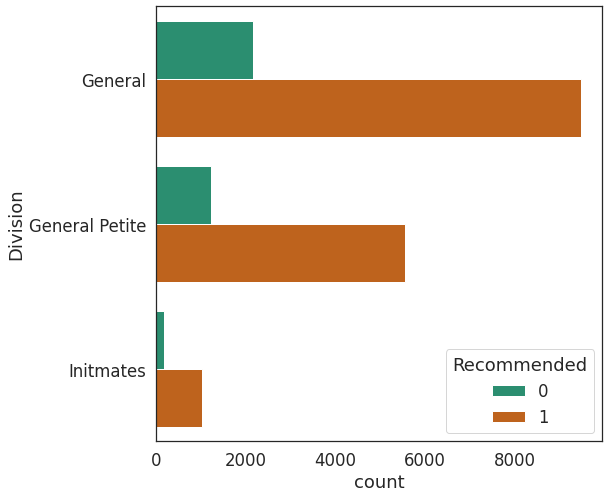

In [103]:
sns.countplot(data=df, y='Division', hue='Recommended', palette='Dark2')
plt.show

The general division is highly recommended while intimates receive the least recommendations 

# Wordcloud

Method 1

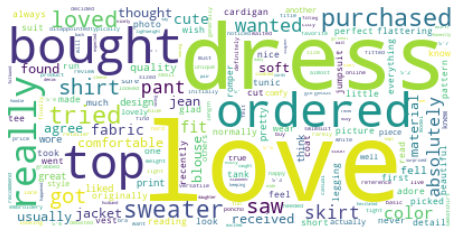

In [106]:
from wordcloud import WordCloud
text = " ".join(cat.split()[1] for cat in df.Text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Method 2

In [41]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x >= 2 else 0)

In [42]:
positive = df[df['Rating'] == 1 ]
negative = df[df['Rating'] == 0]

In [43]:
df.columns

Index(['Age', 'Title', 'Text', 'Rating', 'Recommended', 'Feedback_Count',
       'Division', 'Department', 'Class'],
      dtype='object')

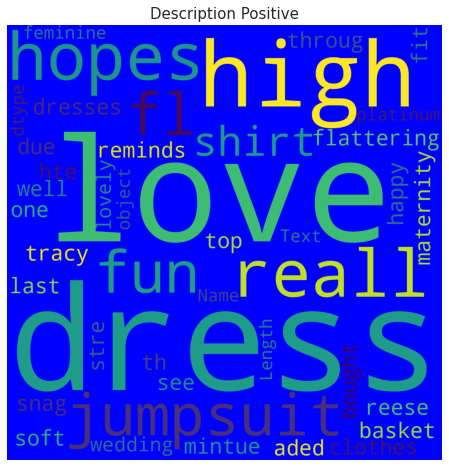

In [48]:
# Wordcloud to show popular positive words

plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('fast')

wc = WordCloud(background_color = 'blue', width = 1500, height = 1500).generate(str(positive['Text']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

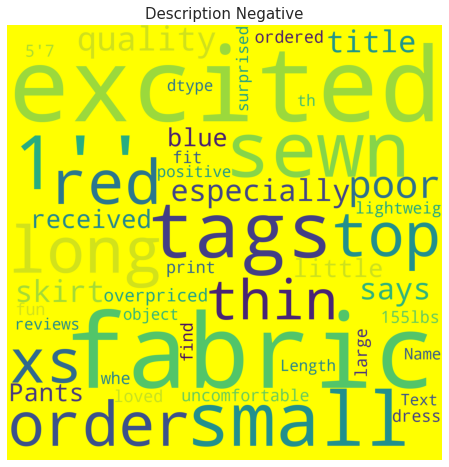

In [47]:
# Wordcloud to show popular negative words
plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('fast')

wc = WordCloud(background_color = 'yellow', width = 1500, height = 1500).generate(str(negative['Text']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

# Modelling

# Text Manipulation 

Tokenization 

-Tokenization is a form of data masking, which replaces sensitive data with a different value, called a token. The token has no value, and there should be no way to trace back from the token to the original data. When data is tokenized, the original, sensitive data is still stored securely at a centralized location, and must be protected


-It is a non-mathematical approach that replaces sensitive data with non-sensitive substitutes without altering the type or length of data. This is an important distinction from encryption because changes in data length and type can render information unreadable in intermediate systems such as databases.

-When applied in banking, tokenization helps protect cardholder data. When a business processes a payment using a token, only the tokenization system can swap the token with a corresponding primary account number (PAN). The tokenization system then sends it to the payment processor for authorization. This ensures that business systems never store, transmit, or record the PAN—only the generated token.

 

-Cloud tokenization platforms can help prevent the exposure of sensitive data. This can prevent attackers from capturing usable information. However, tokenization is not intended to stop threat actors from penetrating networks and information systems. Rather, a tokenization system serves as a security layer designed especially to protect sensitive data.

In [112]:
# Importing the Natural Language Toolkit which is necessary for the next steps
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [113]:
df.columns

Index(['Age', 'Title', 'Text', 'Rating', 'Recommended', 'Feedback_Count',
       'Division', 'Department', 'Class', 'all_text'],
      dtype='object')

In [114]:
# Defining the text bit 
df['all_text'] = df['Text']

In [115]:
# Function for tokenization 

def tokenize(column):
    # Tokenizes a Pandas dataframe columns and returns a list of tokens.
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha]

In [ ]:
# Using the Pandas apply() function with lambda to pass in the column containing our string of text, which is called all_text
# The tokenize() function created above returns a list, which we’ll assign to a new column called tokenized

In [118]:
df['tokenized'] = df.apply(lambda x: tokenize(x['all_text']), axis=1)
df[['Text', 'tokenized']].head(10) # Viewing the first 5 rows after tokenization

,Text,tokenized
2,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, this, jumpsuit, .,..."
4,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, but, this,..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."
7,"I ordered this in carbon for store pick up, an...","[I, ordered, this, in, carbon, for, store, pic..."
8,I love this dress. i usually get an xs but it ...,"[I, love, this, dress, ., i, usually, get, an,..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...","[I, 'm, 5, '', 5, ', and, 125, lbs, ., i, orde..."
10,Dress runs small esp where the zipper area run...,"[Dress, runs, small, esp, where, the, zipper, ..."
12,More and more i find myself reliant on the rev...,"[More, and, more, i, find, myself, reliant, on..."


Removing Stopwords 

-The words which are generally filtered out before processing a natural language 
-These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.

In [120]:
# Using the natural language toolkit to download the stopwords generator

nltk.download('stopwords');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
# Function to remove the stopwords and return a list of tokens with English stopwords removed as recognized by the library

def remove_stopwords(tokenized_column):
    stop_words = set(stopwords.words('english'))
    return[word for word in tokenized_column if not word in stop_words]

In [125]:
# Using the same apply() and lambda approach to run the remove_stopwords() function on each row of the dataframe
# writing the new list of words to a column called stopwords_removed

df['stopwords_removed'] = df.apply(lambda x : remove_stopwords(x['tokenized']), axis=1)
df[['Text', 'stopwords_removed']].head(10)


,Text,stopwords_removed
2,I had such high hopes for this dress and reall...,"[I, high, hopes, dress, really, wanted, work, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[This, shirt, flattering, due, adjustable, fro..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, one, petit..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, basket, hte, last, mintue, see, woul..."
7,"I ordered this in carbon for store pick up, an...","[I, ordered, carbon, store, pick, ,, ton, stuf..."
8,I love this dress. i usually get an xs but it ...,"[I, love, dress, ., usually, get, xs, runs, li..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...","[I, 'm, 5, '', 5, ', 125, lbs, ., ordered, pet..."
10,Dress runs small esp where the zipper area run...,"[Dress, runs, small, esp, zipper, area, runs, ..."
12,More and more i find myself reliant on the rev...,"[More, find, reliant, reviews, written, savvy,..."


Stemming 

- Stemming refers to the technique or method of reducing words with similar meaning into their “stem” or “root” form. 
- For example, take the words “computer”, “computerization” and “computerize” into consideration. These words have different spellings and usage but can all be traced back to their “stem” form which is nothing but “compute”. The prefixes “er”, “rization” and “prize” have been chopped off.
- Morphological analysis refers to the analysis of a word based on the meaningful parts contained within. Those without a good understanding of how words are formed may face problems with reading comprehension.
- Another technique; Lemmatization refers to the process of converting a word into its base form. In NLP, lemmatization considers the context and converts the word into a meaningful base form. The converted word is called as lemmas.
-The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
- The main difference between stemming and lemmatization is that the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes 
- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma
- Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech
- Stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications


In [127]:
def apply_stemming(tokenized_column):
    # this function will return a list of tokens with PorterStemming applied
    # The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and inflexional endings from words in English
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [132]:
df['porter_stemmed'] = df.apply(lambda x : apply_stemming(x['stopwords_removed']), axis=1)
df[['Text', 'porter_stemmed']].head(10)

,Text,porter_stemmed
2,I had such high hopes for this dress and reall...,"[I, high, hope, dress, realli, want, work, ., ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[thi, shirt, flatter, due, adjust, front, tie,..."
5,"I love tracy reese dresses, but this one is no...","[I, love, traci, rees, dress, ,, one, petit, ...."
6,I aded this in my basket at hte last mintue to...,"[I, ade, basket, hte, last, mintu, see, would,..."
7,"I ordered this in carbon for store pick up, an...","[I, order, carbon, store, pick, ,, ton, stuff,..."
8,I love this dress. i usually get an xs but it ...,"[I, love, dress, ., usual, get, xs, run, littl..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...","[I, 'm, 5, '', 5, ', 125, lb, ., order, petit,..."
10,Dress runs small esp where the zipper area run...,"[dress, run, small, esp, zipper, area, run, .,..."
12,More and more i find myself reliant on the rev...,"[more, find, reliant, review, written, savvi, ..."


Rejoining the Words

In [129]:
# The final step is to take our last list of tokens and rejoin them back into a string so we can pass it to a vectorizer which is easy
# We just pass the tokenized_column (which will be porter_stemmed for us) and use join() to join the words into a string, placing a space between each word


# Function to rejoin the words 

def rejoin_words(tokenized_column):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(tokenized_column))


In [131]:
df['rejoined'] = df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
df[['Text', 'rejoined']].head(5)

,Text,rejoined
2,I had such high hopes for this dress and reall...,I high hope dress realli want work . initi ord...
3,"I love, love, love this jumpsuit. it's fun, fl...","I love , love , love jumpsuit . 's fun , flirt..."
4,This shirt is very flattering to all due to th...,thi shirt flatter due adjust front tie . perfe...
5,"I love tracy reese dresses, but this one is no...","I love traci rees dress , one petit . 5 feet t..."
6,I aded this in my basket at hte last mintue to...,I ade basket hte last mintu see would look lik...


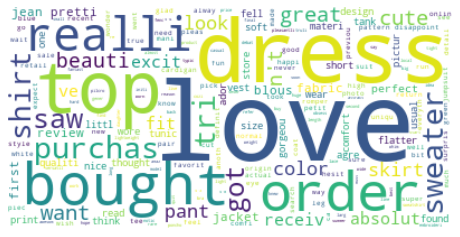

In [133]:
# Wordcloud to display output 

text = " ".join(cat.split()[1] for cat in df.rejoined)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ML Algorithms 

In [ ]:
from sklearn.model_selection import train_test_split
# spliting the data into trainng and testing data:- 
X_train, X_test, y_train, y_test = train_test_split(data['rejoined'],
                                                   data['Recommended'], test_size=0.3,random_state=0)

In [134]:
# Defining the X and y

X = df['rejoined']
y = df['Recommended']

In [135]:
# Train_Test_Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [136]:
X_train.head()

21859    I absolut addict tunic . , saw sale , extra 30...
20107    the shirt beauti , fit much small . stitch lim...
11128    probabl comfort jean ever own . comfort even y...
7346     I look cuddli yet nice look sweater like one l...
3621     thi top run quit larg . normal xs top ( 'm 5'7...
Name: rejoined, dtype: object

In [139]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13763,)
(5899,)
(13763,)
(5899,)


CountVectorizer

- Scikit-learn’s CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
# Fitting the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [142]:
vect.get_feature_names()[::1000]

['00', 'bead', 'cord', 'fave', 'ingest', 'move', 'ps', 'smash', 'twee']

In [143]:
len(vect.get_feature_names())

8740

In [144]:
# Transforming the document in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<13763x8740 sparse matrix of type '<class 'numpy.int64'>'
	with 373231 stored elements in Compressed Sparse Row format>

SVM Classifier

In [ ]:
# SVM Classifier

from sklearn import svm
clf = svm.SVC(kernel='linear')
# train the classifier: 
clf.fit(X_train_vectorized, y_train)

In [145]:
# SVM Classifier 

from sklearn import svm
clf = svm.SVC(kernel = 'linear')
# training the classifier:
clf.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

Model Evaluation 

In [149]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
# predict the transformed test documents: =
predictions = clf.predict(vect.transform(X_test))
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1072
           1       0.91      0.92      0.92      4827

    accuracy                           0.87      5899
   macro avg       0.78      0.77      0.77      5899
weighted avg       0.86      0.87      0.86      5899



In [157]:
print('Accuracy score: ',(accuracy_score(y_test, predictions)))
print('F1_score: ',(f1_score(y_test, predictions)))

Accuracy score:  0.8655704356670623
F1_score:  0.9182726991652066


We get an accuracy of 86.5% and an F1_score of 91.8% 

TFIDF 

- Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus
-The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus
-Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query
-One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model
-Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fitting the TFIDF Vectorizer to the training data specifying a minimum document frequency of 10
vector = TfidfVectorizer(min_df = 5).fit(X_train)
len(vector.get_feature_names())

3071

In [164]:
X_train_vectorized = vect.transform(X_train)
model = svm.SVC(kernel ='linear')
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('accuracy;', accuracy_score(y_test,predictions))

accuracy; 0.8655704356670623


We have a resulting accuracy of 86.5% after